In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-highest-grossing-movies-of-all-time/Top_1000_Highest_Grossing_Movies_Of_All_Time.csv
/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms.csv
/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
movies_df = pd.read_csv("/kaggle/input/the-movies-dataset/movies_metadata.csv", low_memory=False)

In [87]:
movies_df.info()
pd.set_option('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [88]:
movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [89]:
missing_values = movies_df.isnull().sum()
print(missing_values)

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [90]:
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [91]:
def stats(column):
    statistics = []
    mean_val = movies_df[column].mean()
    median_val = movies_df[column].median()
    mode_val = movies_df[column].mode()[0]
    q1 = movies_df[column].quantile(0.25)
    q3 = movies_df[column].quantile(0.75)
    maxi = movies_df[column].max()
    mini = movies_df[column].min()
    statistics.append(mean_val)
    statistics.append(median_val)
    statistics.append(mode_val)
    statistics.append(q1)
    statistics.append(q3)
    statistics.append(maxi)
    statistics.append(mini)
    return statistics

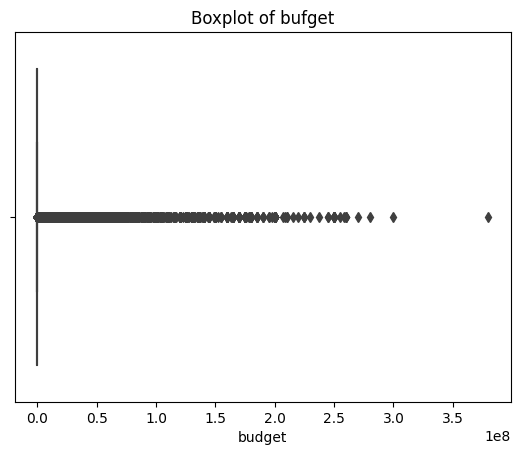

In [92]:
sns.boxplot(x=movies_df['budget'])
plt.title("Boxplot of bufget")
plt.savefig("box_plot_budget.png",dpi=700)
plt.show()

In [93]:
print(stats('popularity'))

[2.9214783449186092, 1.127685, 0.0, 0.38594775, 3.67890225, 547.488298, 0.0]


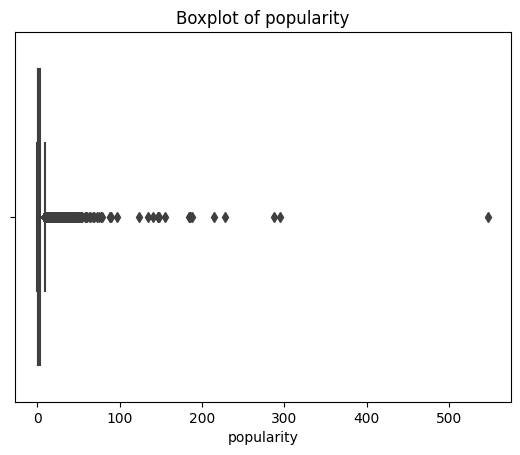

In [94]:
sns.boxplot(x=movies_df['popularity'])
plt.title("Boxplot of popularity")
plt.savefig("box_plot_popularity.png", dpi=700)
plt.show()

In [95]:
print(stats('revenue'))

[11209348.539265288, 0.0, 0.0, 0.0, 0.0, 2787965087.0, 0.0]


In [96]:
print(stats('runtime'))

[94.12819945578833, 95.0, 90.0, 85.0, 107.0, 1256.0, 0.0]


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


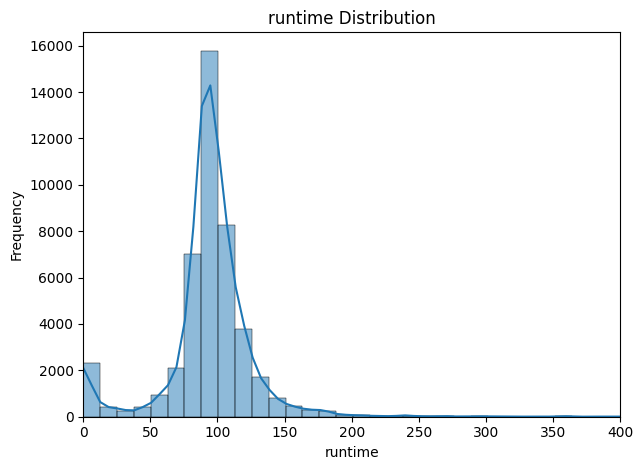

In [97]:
sns.histplot(movies_df['runtime'], bins=100, kde=True)
plt.xlabel('runtime')
plt.ylabel('Frequency')
plt.title('runtime Distribution')
plt.tight_layout()
plt.xlim(0,400)
plt.savefig("runtime_distribuition.png", dpi=700)
plt.show()

In [98]:
print(stats('vote_count'))

[109.89733831940167, 10.0, 1.0, 3.0, 34.0, 14075.0, 0.0]


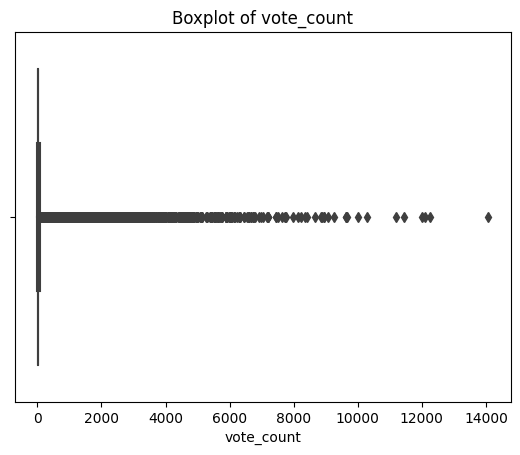

In [99]:
sns.boxplot(x=movies_df['vote_count'])
plt.title("Boxplot of vote_count")
plt.savefig("box_plot_vote_.png", dpi=700)
plt.show()

In [100]:
print(stats('vote_average'))

[5.618207215134183, 6.0, 0.0, 5.0, 6.8, 10.0, 0.0]


In [101]:
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       3
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   6
poster_path                386
production_companies         3
production_countries         3
release_date                90
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [102]:
print(stats('budget'))

[4224578.813474693, 0.0, 0.0, 0.0, 0.0, 380000000.0, 0.0]


In [103]:
movies_df['belongs_to_collection'] = movies_df['belongs_to_collection'].fillna("")
movies_df['homepage'] = movies_df['homepage'].fillna("")
movies_df['imdb_id'] = movies_df['imdb_id'].fillna(0)
movies_df['original_language'] = movies_df['original_language'].fillna(movies_df['original_language'].mode()[0])
movies_df['overview'] = movies_df['overview'].fillna("")
movies_df['popularity'] = movies_df['popularity'].fillna(movies_df['popularity'].median())
movies_df['revenue'] = movies_df['revenue'].fillna(movies_df['revenue'].mean())
movies_df['budget'] = movies_df['budget'].fillna(movies_df['budget'].mean())
movies_df['runtime'] = movies_df['runtime'].fillna(movies_df['runtime'].median())
movies_df['vote_count'] = movies_df['vote_count'].fillna(movies_df['vote_count'].median())
movies_df['vote_average'] = movies_df['vote_average'].fillna(movies_df['vote_average'].mean())
movies_df['status'] = movies_df['vote_average'].fillna("released")
movies_df['tagline'] = movies_df['tagline'].fillna("")
movies_df['production_companies'] = movies_df['production_companies'].fillna(movies_df['production_companies'].mode()[0])
movies_df['production_countries'] = movies_df['production_countries'].fillna(movies_df['production_countries'].mode()[0])
movies_df['release_date'] = movies_df['release_date'].fillna(movies_df['release_date'].max())


In [104]:
movies_df['year'] = movies_df['release_date'].dt.year

In [105]:
missing_values = movies_df.isnull().sum()
print(missing_values)

adult                      0
belongs_to_collection      0
budget                     0
genres                     0
homepage                   0
id                         0
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path              386
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           6
status                     0
tagline                    0
title                      6
video                      6
vote_average               0
vote_count                 0
year                       0
dtype: int64


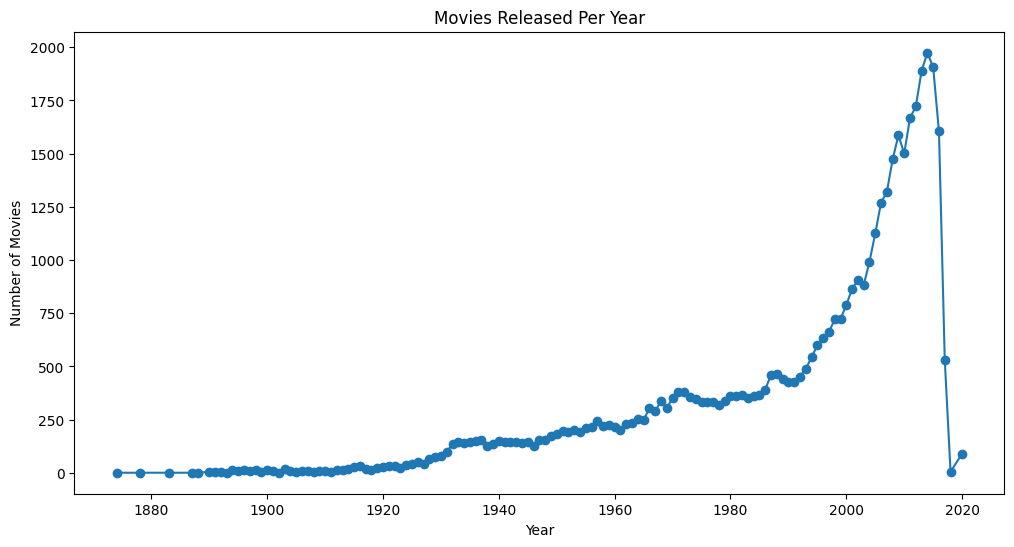

In [106]:
movies_df['release_year'] = movies_df['release_date'].dt.year
yearly_movies = movies_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(yearly_movies.index, yearly_movies.values, marker='o')
plt.title("Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.savefig("Movies released per year.png", dpi=700)
plt.show()

In [107]:
budget_per_year = movies_df.groupby('year')['budget'].sum()

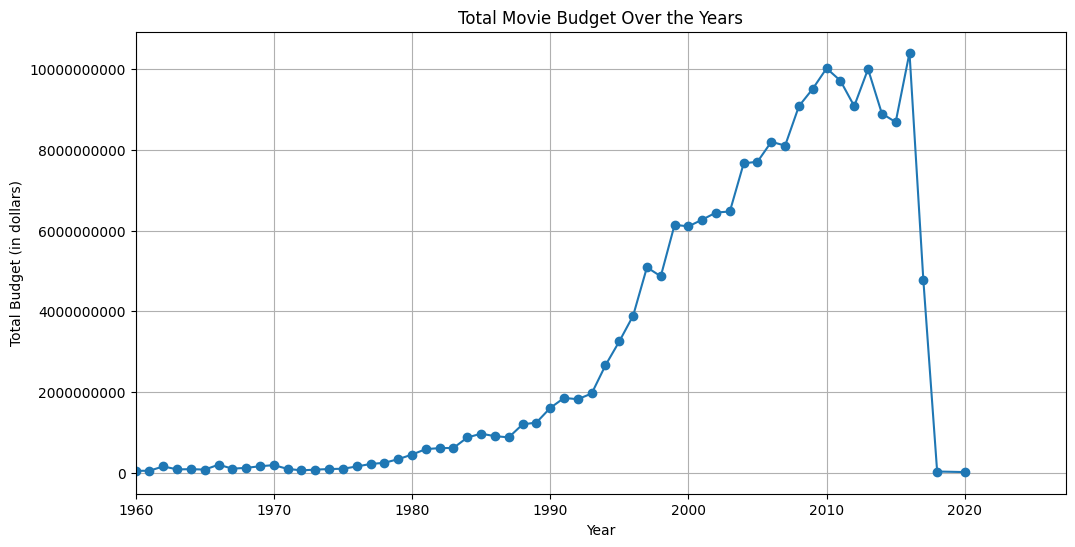

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(budget_per_year.index, budget_per_year.values, marker='o', linestyle='-')

plt.title("Total Movie Budget Over the Years")
plt.xlabel("Year")
plt.xlim(1960)
plt.ylabel("Total Budget (in dollars)")
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.savefig("movie budget.png", dpi=700)

plt.show()


In [109]:
top_10_budget = movies_df.nlargest(10, 'budget')
print(top_10_budget[['title', 'budget']])

                                             title       budget
17124  Pirates of the Caribbean: On Stranger Tides  380000000.0
11827     Pirates of the Caribbean: At World's End  300000000.0
26558                      Avengers: Age of Ultron  280000000.0
11067                             Superman Returns  270000000.0
16130                                      Tangled  260000000.0
18685                                  John Carter  260000000.0
44842                Transformers: The Last Knight  260000000.0
11780                                 Spider-Man 3  258000000.0
21175                              The Lone Ranger  255000000.0
13893       Harry Potter and the Half-Blood Prince  250000000.0


In [110]:
top_10_revenue = movies_df.nlargest(10, 'revenue')
print(top_10_revenue[['title', 'revenue']])

                                              title       revenue
14551                                        Avatar  2.787965e+09
26555                  Star Wars: The Force Awakens  2.068224e+09
1639                                        Titanic  1.845034e+09
17818                                  The Avengers  1.519558e+09
25084                                Jurassic World  1.513529e+09
28830                                     Furious 7  1.506249e+09
26558                       Avengers: Age of Ultron  1.405404e+09
17437  Harry Potter and the Deathly Hallows: Part 2  1.342000e+09
22110                                        Frozen  1.274219e+09
42222                          Beauty and the Beast  1.262886e+09


In [111]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

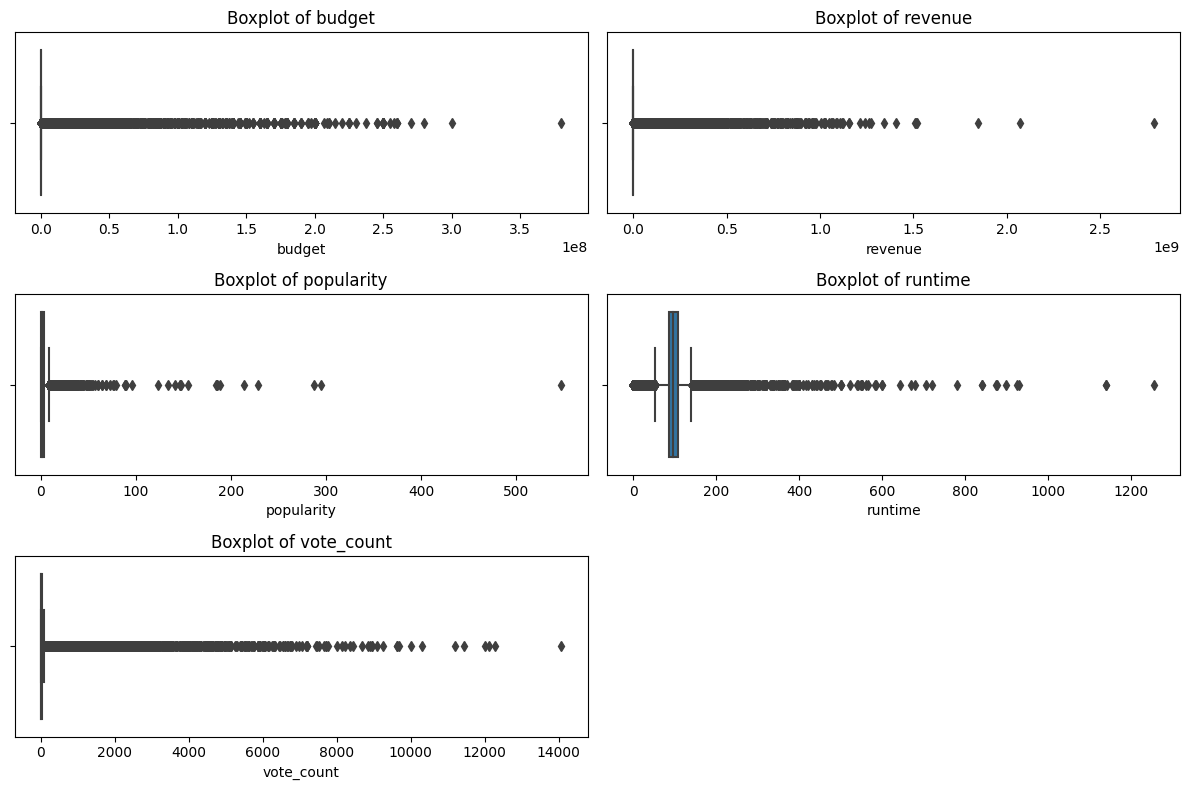

In [112]:
columns = ["budget", "revenue", "popularity", "runtime", "vote_count"]

outliers = {}
for col in columns:
    outliers[col] = detect_outliers_iqr(movies_df, col)


plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=movies_df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.savefig("Box_plot.png", dpi=700)
plt.show()

In [113]:
for col in columns:
    print(f"Number of outliers in {col}: {len(outliers[col])}")

Number of outliers in budget: 8893
Number of outliers in revenue: 7414
Number of outliers in popularity: 4237
Number of outliers in runtime: 5417
Number of outliers in vote_count: 6889


In [114]:
movies_df['budget'] = np.log1p(movies_df['budget'])
movies_df['revenue'] = np.log1p(movies_df['revenue'])
movies_df['populairty'] = np.log1p(movies_df['popularity'])

In [115]:
#Chat GPT Code.
#Replace values above the 99th percentile with the 99th percentile value to limit their impact.

popularity_threshold = movies_df['popularity'].quantile(0.99)
movies_df['popularity'] = movies_df['popularity'].apply(lambda x: popularity_threshold if x > popularity_threshold else x)

In [116]:
max_runtime = movies_df['runtime'].quantile(0.99)
movies_df = movies_df[(movies_df['runtime'] >= 30) & (movies_df['runtime'] <= max_runtime)]

In [117]:
movies_df = movies_df[movies_df['vote_count'] >= 5]

movies_df['vote_count'] = np.log1p(movies_df['vote_count']) 

In [118]:
movies_df.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year,release_year,populairty
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",17.216708,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",17.001435,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,19.738573,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.7,,Toy Story,False,7.7,8.597113,1995,1995,3.133185
1,False,,17.989898,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.001435,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,19.386893,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",6.9,Roll the dice and unleash the excitement!,Jumanji,False,6.9,7.789040,1995,1995,2.891235
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.000000,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.5,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,4.532599,1995,1995,2.542617
3,False,,16.588099,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,18.215526,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6.1,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,3.555348,1995,1995,1.580935
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.000000,"[{'id': 35, 'name': 'Comedy'}]",,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,18.153832,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",5.7,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,5.159055,1995,1995,2.239381


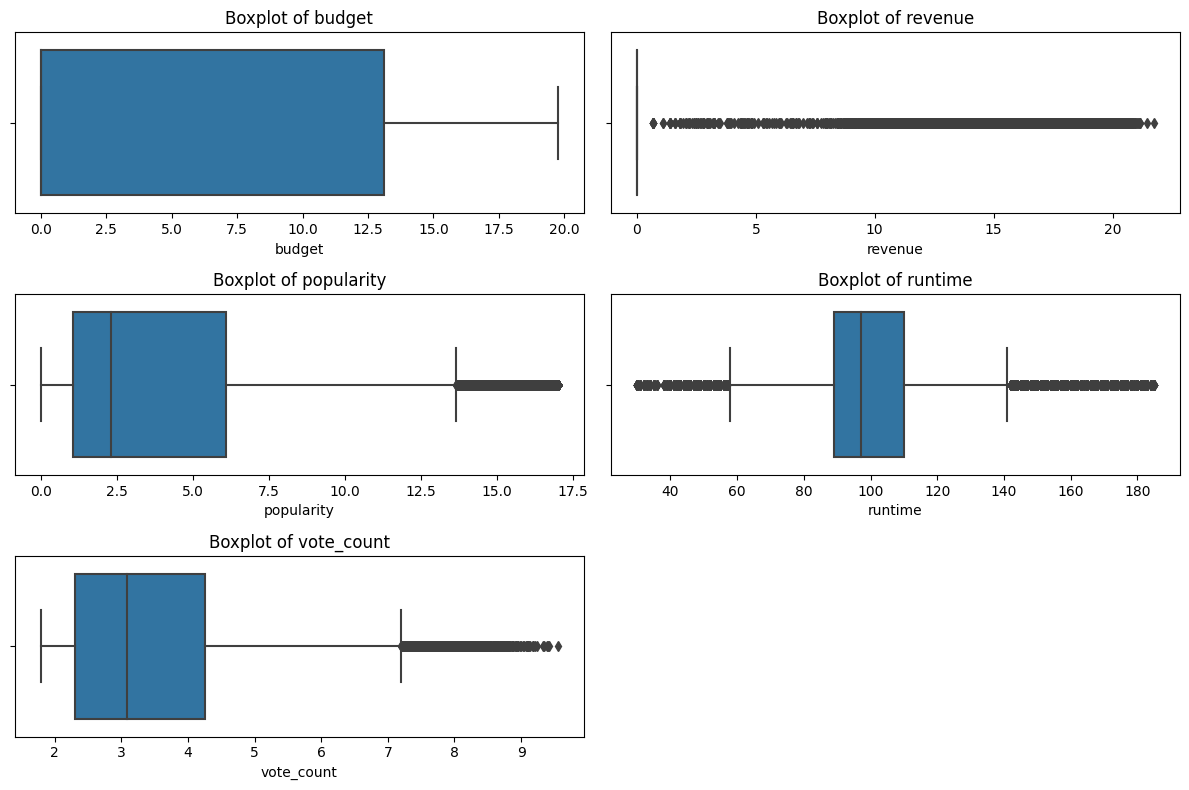

In [119]:
columns = ["budget", "revenue", "popularity", "runtime", "vote_count"]

outliers = {}
for col in columns:
    outliers[col] = detect_outliers_iqr(movies_df, col)


plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=movies_df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.savefig("Box_plot_after.png", dpi=700)
plt.show()

In [120]:
movies_df['revenue'].describe()

count    29298.000000
mean         3.892465
std          7.052079
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.748578
Name: revenue, dtype: float64

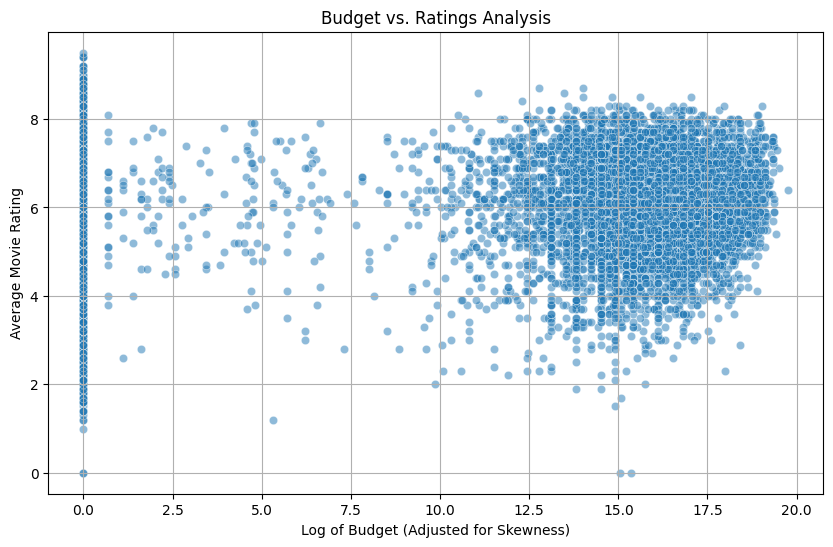

In [121]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies_df, x='budget', y='vote_average', alpha=0.5)
plt.xlabel("Log of Budget (Adjusted for Skewness)")
plt.ylabel("Average Movie Rating")
plt.title("Budget vs. Ratings Analysis")
plt.grid(True)
plt.savefig("scatter_bufgetvsrating",dpi=700)
plt.show()

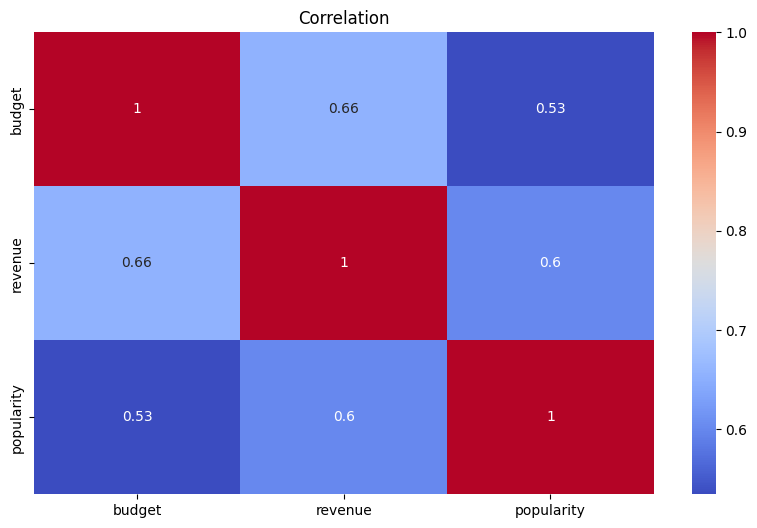

In [122]:
attributes = ['budget', 'revenue', 'popularity']
plt.figure(figsize=(10, 6))
sns.heatmap(movies_df[attributes].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation")
plt.show()

In [123]:
correlation = movies_df[['budget', 'revenue']].corr()
print(correlation)

           budget   revenue
budget   1.000000  0.656052
revenue  0.656052  1.000000


In [124]:
print(movies_df['genres'].isnull().sum())
col = movies_df['genres']
movies_df['genres'] = movies_df['genres'].apply(eval)
print(col[0])

0
[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


In [125]:
genre_list = []
movies_df['genres']
i = 0
for genres in movies_df['genres']:
    genre_once = []
    for genre in genres:
        genre_once.append(genre['name'])
    genre_list.append(genre_once)
        


In [126]:
all_genres = []
for genre_list in movies_df['genres']:
    for genre in genre_list:
        all_genres.append(genre['name'])
genre_counts = pd.Series(all_genres).value_counts()
print(genre_counts)

Drama                                    14123
Comedy                                    9311
Thriller                                  6205
Action                                    5241
Romance                                   4815
Horror                                    3906
Crime                                     3313
Adventure                                 2776
Science Fiction                           2449
Family                                    2097
Mystery                                   1903
Fantasy                                   1800
Documentary                               1703
Animation                                 1223
Music                                      992
History                                    966
Foreign                                    934
War                                        898
Western                                    647
TV Movie                                   475
Mardock Scramble Production Committee        1
Rogue State  

In [127]:
available_genres = set()
for genre in all_genres:
   if genre not in available_genres:
        available_genres.add(genre)
available_genres = sorted(list(available_genres))
print(available_genres)

['Action', 'Adventure', 'Animation', 'Aniplex', 'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands', 'History', 'Horror', 'Mardock Scramble Production Committee', 'Music', 'Mystery', 'Odyssey Media', 'Pulser Productions', 'Rogue State', 'Romance', 'Science Fiction', 'Sentai Filmworks', 'TV Movie', 'Telescene Film Group Productions', 'The Cartel', 'Thriller', 'Vision View Entertainment', 'War', 'Western']


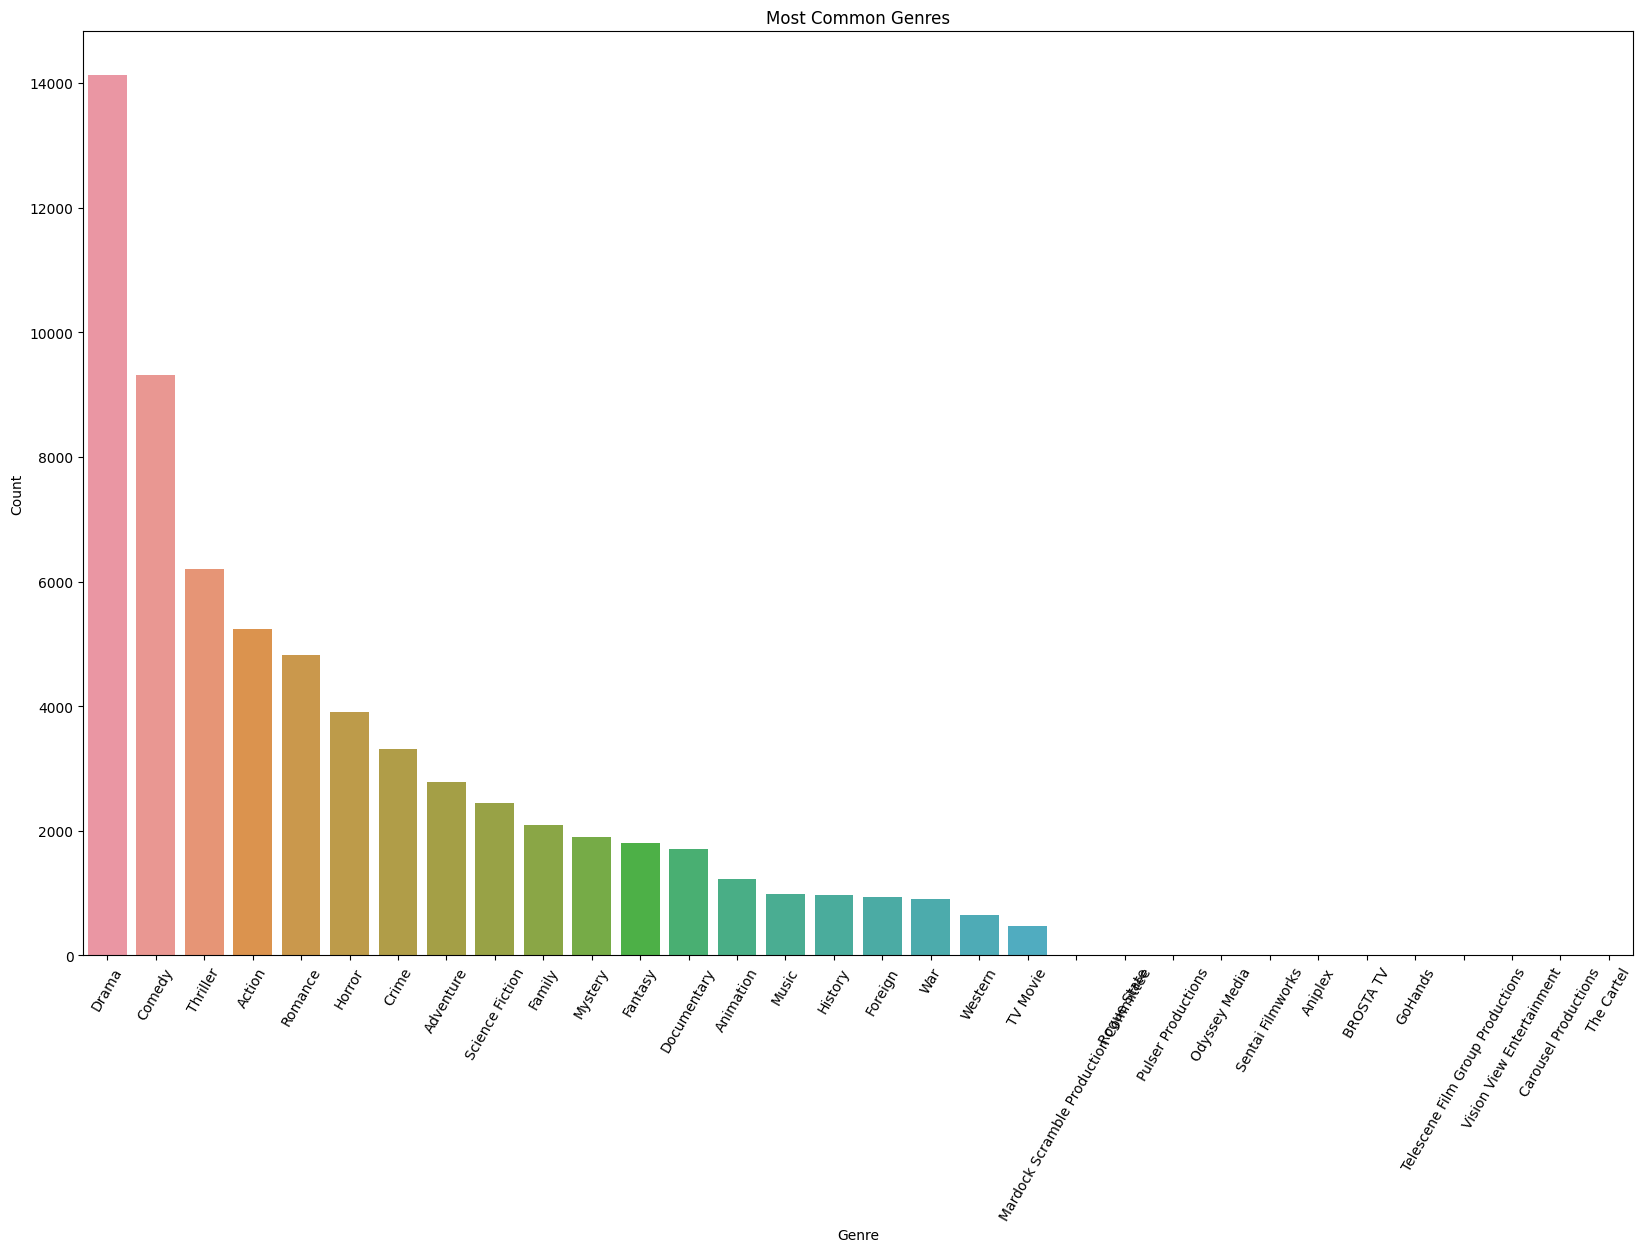

In [128]:
plt.figure(figsize=(20, 12))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=60)
plt.title("Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.savefig("bar graph of most common genres.png", dpi =700)
plt.show()


In [129]:
movies_df['production_comapnies'] = movies_df['production_companies'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Chat GPT Code
movies_df['production_companies'] = movies_df['production_comapnies'].apply(lambda x: [] if isinstance(x, bool) else x)

In [130]:
Production = []
movies_df['production_companies']
for prods in movies_df['production_companies']:
    prod_once = []
    for prod in prods:
        prod_once.append(prod['name'])
    Production.append(prod_once)

all_productions = []
for prods in movies_df['production_companies']:
    for prod in prods:
        all_productions.append(prod['name'])
prod_counts = pd.Series(all_productions).value_counts()
print(prod_counts)



Warner Bros.                              939
Paramount Pictures                        803
Universal Pictures                        753
Twentieth Century Fox Film Corporation    665
Metro-Goldwyn-Mayer (MGM)                 628
                                         ... 
Beacon Classics                             1
98 MPH Productions                          1
Runaway Fridge TV                           1
Yorkshire Television (YTV)                  1
American World Pictures                     1
Name: count, Length: 19155, dtype: int64


In [131]:
limited_prods = prod_counts[prod_counts.values > 110]

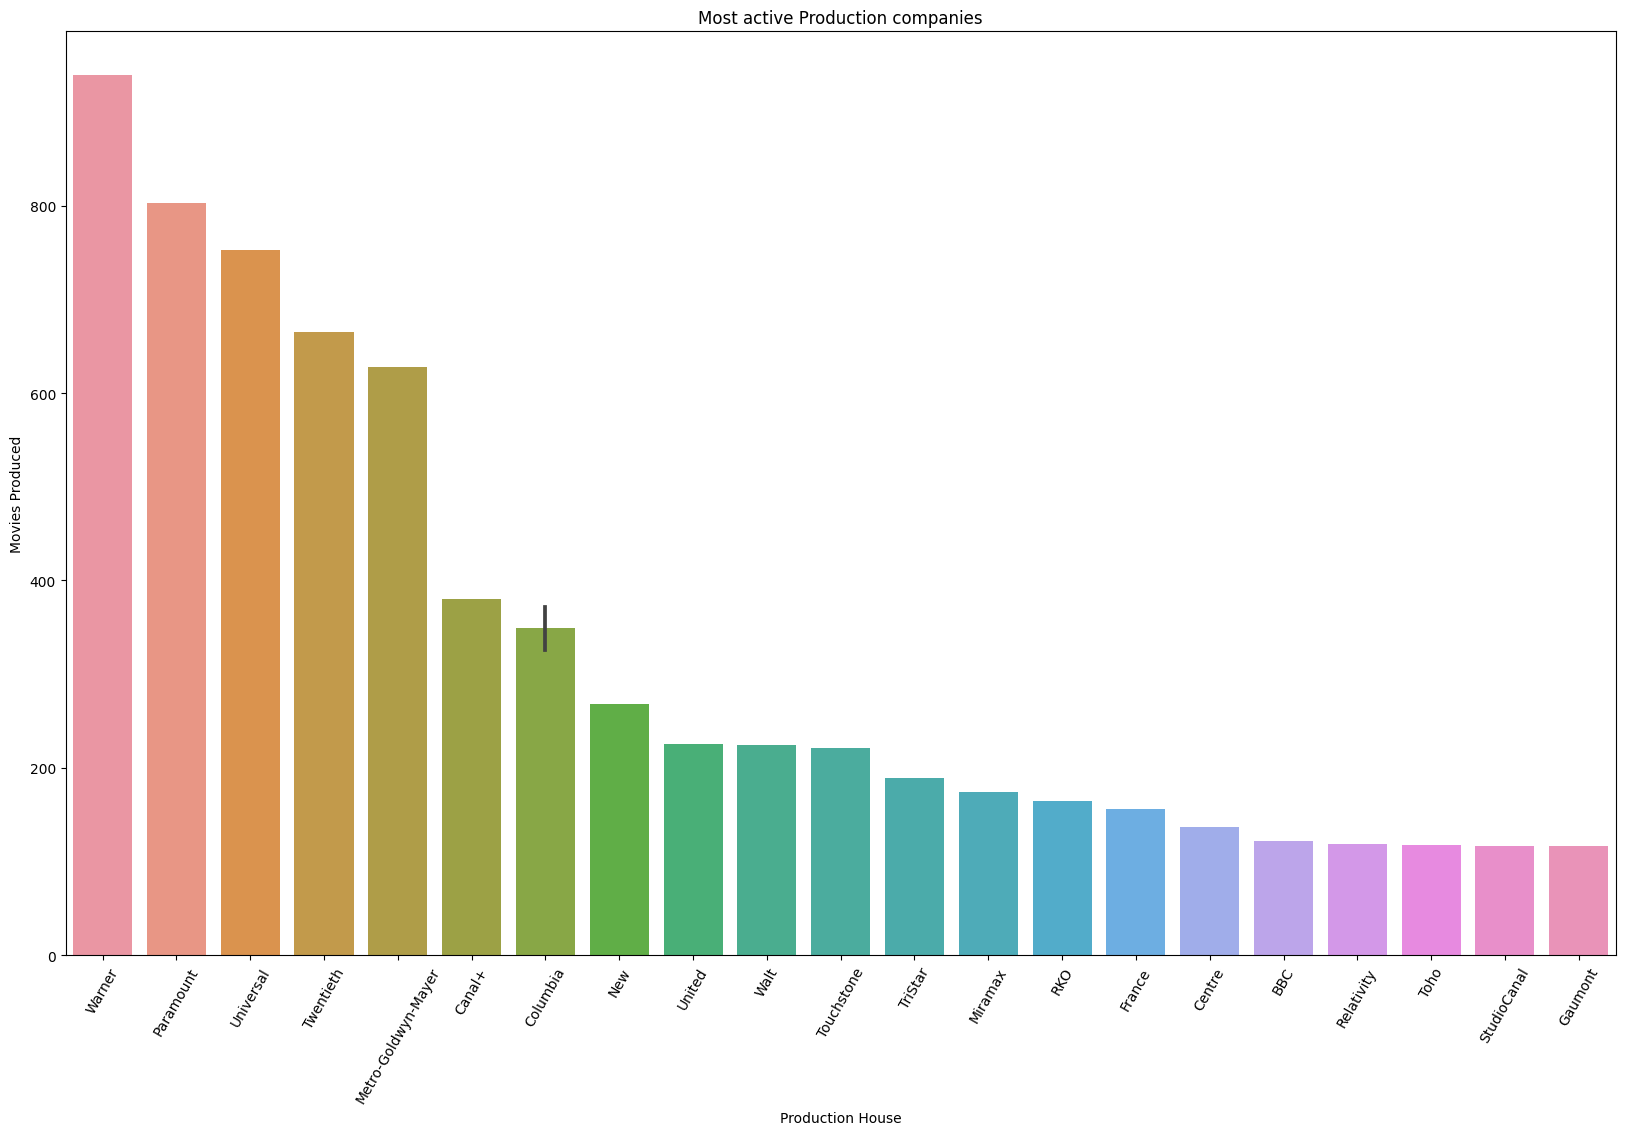

In [132]:
plt.figure(figsize=(20, 12))
sns.barplot(x=limited_prods.index.str.split().str[0], y=limited_prods.values)
plt.xticks(rotation=60)
plt.title("Most active Production companies")
plt.xlabel("Production House")
plt.ylabel("Movies Produced")
plt.savefig("Production_activity.png", dpi=700)
plt.show()


In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
movies_df['normalized_budget'] = scaler.fit_transform(movies_df[['budget']])

In [134]:
movies_df['normalized_revenue'] = scaler.fit_transform(movies_df[['revenue']])

In [135]:
movies_df['normalized_popularity'] = scaler.fit_transform(movies_df[['popularity']])

In [136]:
movies_df['normalized_runtime'] = scaler.fit_transform(movies_df[['runtime']])

In [137]:
movies_df['normalized_vote_average'] = scaler.fit_transform(movies_df[['vote_average']])

In [ ]:
corr_matrix = movies_df[['normalized_budget', 'normalized_revenue', 'normalized_popularity', 
                         'normalized_runtime', 'normalized_vote_average']].corr()


plt.figure(figsize=(13, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Normalized Features')
plt.savefig("Correlatrion.png", dpi =700)
plt.tight_layout()
plt.show()

In [ ]:
underrated_movies = movies_df[(movies_df['normalized_vote_average'] > 0.7) & (movies_df['normalized_popularity'] < 0.3)]


print(underrated_movies[['title', 'vote_average', 'popularity']].head(5))

In [ ]:
ratings_df = pd.read_csv("/kaggle/input/the-movies-dataset/ratings.csv")

In [ ]:
ratings_df.info()

In [ ]:
links = pd.read_csv("/kaggle/input/the-movies-dataset/links.csv")

In [ ]:
links.head()

In [ ]:
missing_values = ratings_df.isnull().sum()
print(missing_values)

In [ ]:
missing = links.isnull().sum()
print(missing)

In [ ]:
#chatgpt Code - used to find the avg rating given by users to a Movie along with the number of reviews
# Removes the prefix from imdb_id in the movies_metadeta dataset
ratings_summary = ratings_df.groupby("movieId")["rating"].agg(avg_rating="mean", num_reviews="count").reset_index()
movies_df["imdb_id"] = movies_df["imdb_id"].astype(str).str.replace("tt", "", regex=False)
movies_df["imdb_id"] = pd.to_numeric(movies_df["imdb_id"], errors="coerce")
ratings_summary

In [ ]:
links["imdbId"] = pd.to_numeric(links["imdbId"], errors="coerce")


In [ ]:
movies = links.merge(movies_df, left_on="imdbId", right_on="imdb_id", how="left")[["movieId", "title"]]
movies_final = ratings_summary.merge(movies, on="movieId", how="left")
movies_final.head()

In [ ]:
ott_df = pd.read_csv('/kaggle/input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms.csv')
ott_df.head()

In [ ]:
service_counts = {
    'Netflix': ott_df['Netflix'].sum(),
    'Prime Video': ott_df['Prime Video'].sum(),
    'Hulu': ott_df['Hulu'].sum(),
    'Disney+': ott_df['Disney+'].sum(),
}


In [ ]:
plt.bar(service_counts.keys(), service_counts.values(), color=['blue', 'green', 'orange', 'red'])


plt.xlabel('Streaming Service')
plt.ylabel('Number of Movies')
plt.title('Movies Available on Each Streaming Service')
plt.savefig("Movies_streaming.png", dpi =700)
plt.show()

In [ ]:
top_grosser = pd.read_csv("/kaggle/input/top-1000-highest-grossing-movies-of-all-time/Top_1000_Highest_Grossing_Movies_Of_All_Time.csv")
top_grosser.head()

In [ ]:
top_grosser.rename(columns={'Year of Realease': 'Year'}, inplace=True)

In [ ]:
top_grosser['Year'] = top_grosser['Year'].astype(str).str.extract('(\d+)').astype(int)

top_grosser['Worldwide LT Gross'] = top_grosser['Worldwide LT Gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

highest_grossing = top_grosser.loc[top_grosser.groupby('Year')['Worldwide LT Gross'].idxmax()]

highest_grossing_movies = highest_grossing[['Year', 'Movie Title', 'Worldwide LT Gross', 'Genre']]

highest_grossing_movies = highest_grossing_movies.sort_values(by='Year')
highest_grossing_movies

In [ ]:
credits_df = pd.read_csv("/kaggle/input/the-movies-dataset/credits.csv", low_memory=False)

In [ ]:
credits_df.head(5)

In [ ]:
credits_df["id"] = pd.to_numeric(credits_df["id"], errors="coerce")


In [ ]:
import ast

def get_director(crew):
    crew_list = ast.literal_eval(crew)  
    for member in crew_list:
        if member.get("job") == "Director":
            return member.get("name")
   

def get_lead_actor(cast):
    cast_list = ast.literal_eval(cast)  
    if cast_list:
        return cast_list[0].get("name")  


In [ ]:
credits_df["director"] = credits_df["crew"].apply(get_director)
credits_df["lead_actor"] = credits_df["cast"].apply(get_lead_actor)

In [ ]:
credits_df.head()

In [ ]:
movies_df["id"] = pd.to_numeric(movies_df["id"], errors="coerce")
movies_df = movies_df.dropna(subset=["id"])
credits_df = credits_df.dropna(subset=["id"])
movies_df["id"] = movies_df["id"].astype(int)

In [ ]:
final_df_unmnodified = credits_df.merge(movies_df, on="id", how="left")

In [ ]:
final_df_unmnodified.head()

In [ ]:
final_df = final_df_unmnodified[['id','title','normalized_budget', 'normalized_revenue', 'normalized_popularity', 'normalized_runtime', 'normalized_vote_average', 'budget','revenue','runtime','production_comapnies','year','imdb_id', 'original_language','genres','lead_actor','director']]

In [ ]:
final_df.head()

In [ ]:
final_df.to_csv('Preprocessed_data', index=False)